<img src='https://scontent.fcai20-3.fna.fbcdn.net/v/t39.30808-6/425515331_814738290690907_8677633134588386382_n.jpg?stp=dst-jpg_p843x403&_nc_cat=105&ccb=1-7&_nc_sid=3635dc&_nc_eui2=AeFKfOqzfRsqTPtLG-bPzcYKqRIbXpqkx1CpEhtemqTHUDA2cP4pS7Sn8piuOsUZX2KnMWWuD2ubE9QrXn7Lck6y&_nc_ohc=xsVpEw7vFqUAX8tCBjr&_nc_ht=scontent.fcai20-3.fna&oh=00_AfBo1Jq5bEIFsrOIS-iXh-RJSEaqB0C4nJ3XMsnJaa7xvQ&oe=65E0E630'>

## Step #1: Problem Statement
## Overview
Predicting if the cancer diagnosis is benign or malignant based on several observations/features.

## Features
32 features are used, including:
- **radius:** Mean of distances from the center to points on the perimeter.
- **texture:** Standard deviation of gray-scale values.
- **perimeter**
- **area**
- **smoothness:** Local variation in radius lengths.
- **compactness:** (perimeter^2 / area) - 1.0.
- **concavity:** Severity of concave portions of the contour.
- **concave points:** Number of concave portions of the contour.
- **symmetry**
- **fractal dimension:** "Coastline approximation" - 1.

## Dataset Information
- Datasets are linearly separable using all 32 input features.
- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign

## Target Class
- Malignant
- Benign

## Step #2: IMPORTING DATA

In [1]:
import pandas as pd                                  
import matplotlib.pyplot as plt       
import plotly.express as px         
import seaborn as sns      
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from warnings import filterwarnings
from sklearn.metrics import classification_report, confusion_matrix
filterwarnings('ignore')

In [2]:
cancer_df = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")

## EDA (Exploratory Data Analysis)

In [3]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cancer_df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
# Checking Null Values

cancer_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**observation:**There are no null values in the data

In [6]:
# some info about the data like coulumns Dtype, memory usage and the number of entries in each column
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Drop 'id' column because it hasn't any valuable information

cancer_df.drop(columns='id', axis=1, inplace=True)

## Step #3: VISUALIZING THE DATA

In [8]:
# mapping the 'didiagnosisa' column

cancer_df['diagnosis'] = cancer_df['diagnosis'].map({'M':1, 'B': 0})

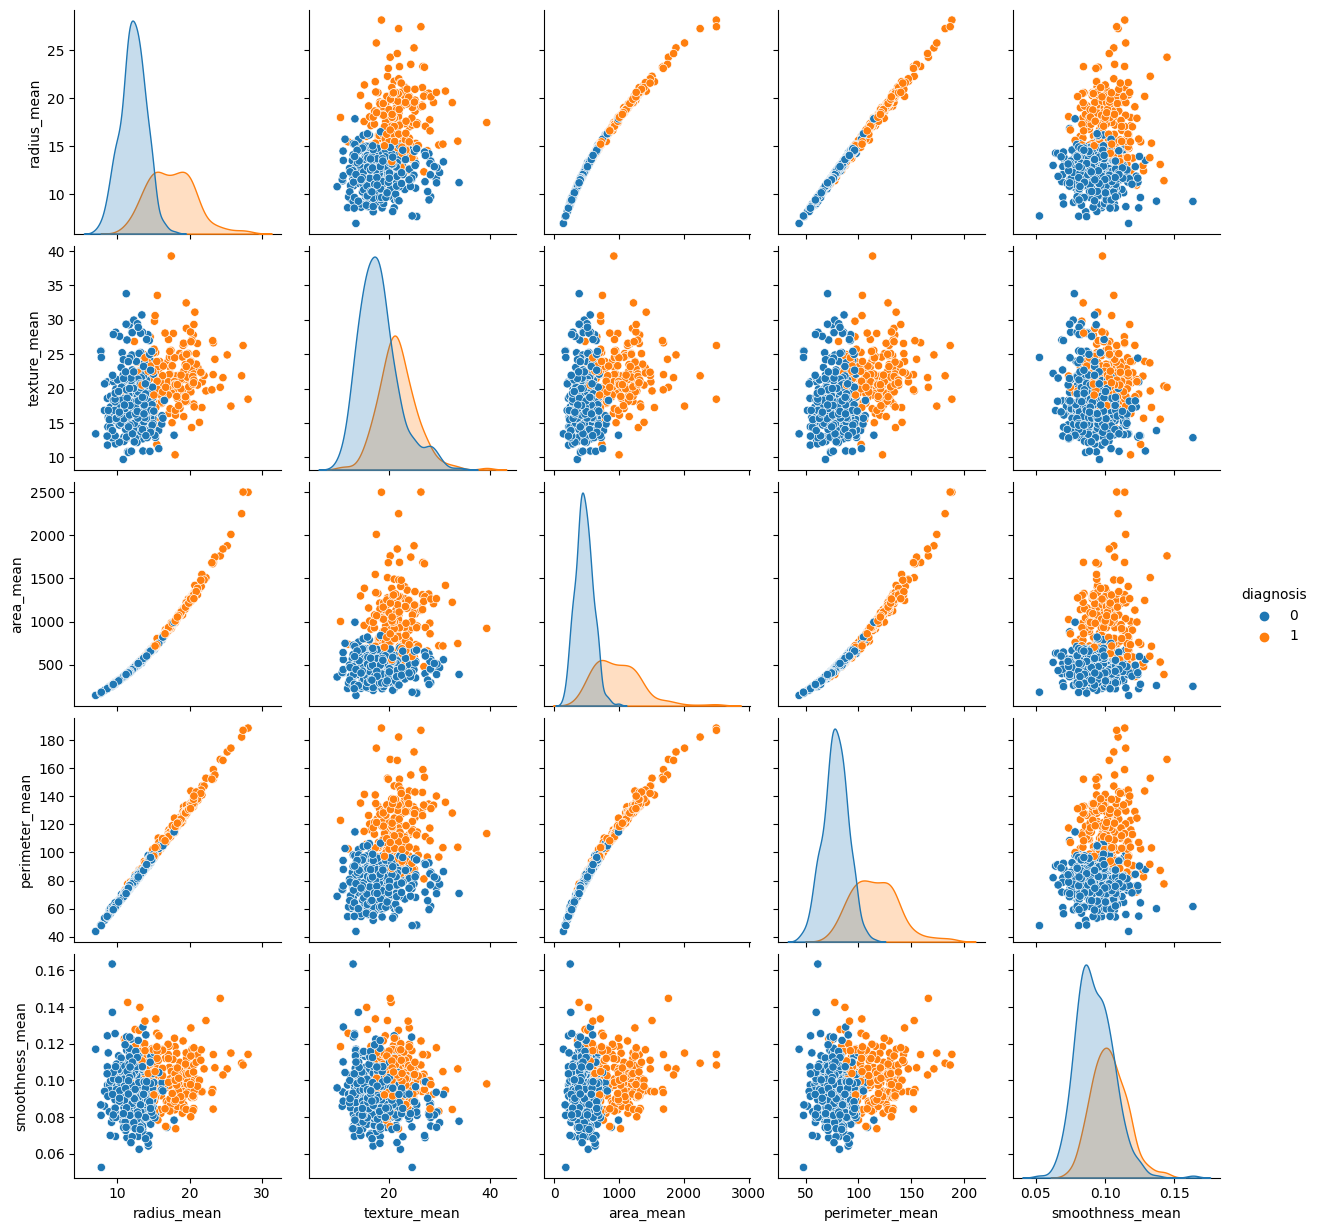

In [9]:
# pair plot for some features  

sns.pairplot(cancer_df, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'] )

In [10]:
# scatter matrix for some features to illustrate the relashionship between some features

fig = px.scatter_matrix(
    cancer_df,
    dimensions=['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'],
    color='diagnosis',
    opacity=0.7,
    height=900 
)

fig.show()

In [11]:
# Bar plot to illustrate the number of each class in out target column "diagnosis"

target_count_df = pd.DataFrame(cancer_df['diagnosis'].value_counts()).reset_index()
fig = px.bar(target_count_df, x='diagnosis', y='count', color='diagnosis')

fig.show()

**observation:** Class Distribution: 212 Malignant, 357 Benign

<Axes: >

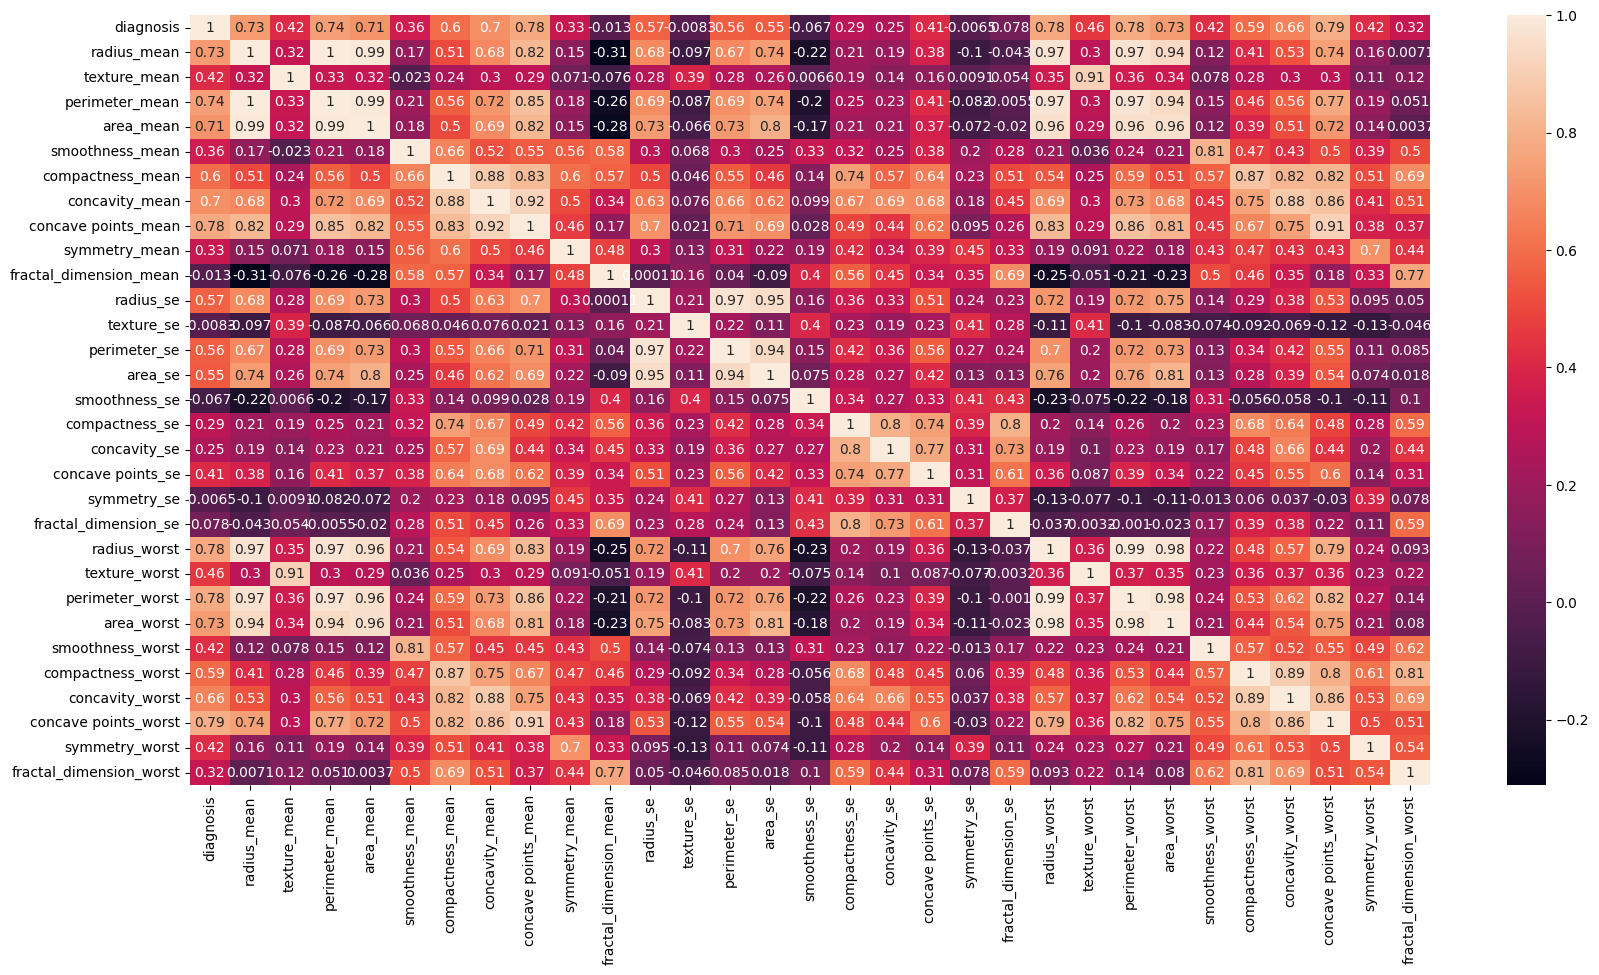

In [12]:
# correlation mtrix that illustrates the relashioship between each feature

plt.figure(figsize=(20,10)) 
sns.heatmap(cancer_df.corr(), annot=True) 

## STEP #4: MODEL TRAINING (FINDING A PROBLEM SOLUTION)

In [13]:
# Splitting the data into 'X' and 'y' which is the target column

X = cancer_df.drop(columns='diagnosis', axis=1)
y = cancer_df['diagnosis']

In [14]:
# Splitting the data into training set (X_train+y_train) and testing set (X_test+y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [15]:
# Printing the shape of each set to ensure its splitting

print(X_train.shape)
print('-'*12)
print(X_test.shape)
print('-'*12)
print(y_train.shape)
print('-'*12)
print(y_test.shape)

(455, 30)
------------
(114, 30)
------------
(455,)
------------
(114,)


In [16]:
# Training the model on the data

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

## STEP #5: EVALUATING THE MODEL

In [17]:
y_pred = svc_model.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

<Axes: >

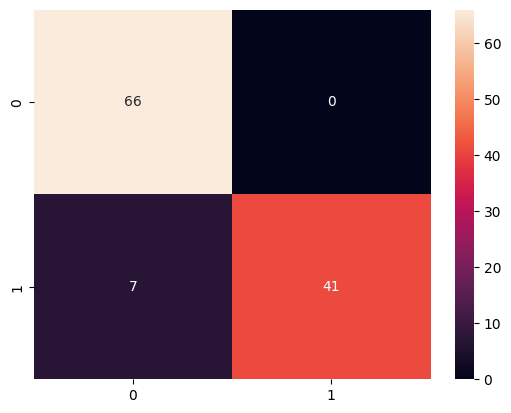

In [18]:
sns.heatmap(cm, annot=True)

In [19]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        66
           1       1.00      0.85      0.92        48

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



**observation:** we get accuracy of 0.94 which is quite good

## Step #6 IMPROVING THE MODEL

In [20]:
# Scatter plot for 'area_mean' and 'smoothness_mean'

fig = px.scatter(X_train, x='area_mean', y='smoothness_mean', color=y_train)
fig.show()

**observation:** The scale of the data is not good as you see the range of y axis is from 0 to 0.16
and the range of x axis is from 0 to 2500

In [21]:
# Applying MinMaxScaler to adjust the scale of data 

scaler = MinMaxScaler() 
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [22]:
# Scatter plot for 'area_mean' and 'smoothness_mean'

fig = px.scatter(X_train, x='area_mean', y='smoothness_mean', color=y_train)
fig.show()

**observation:** The scale is now perfect to apply the model

In [23]:
#  model training

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

<Axes: >

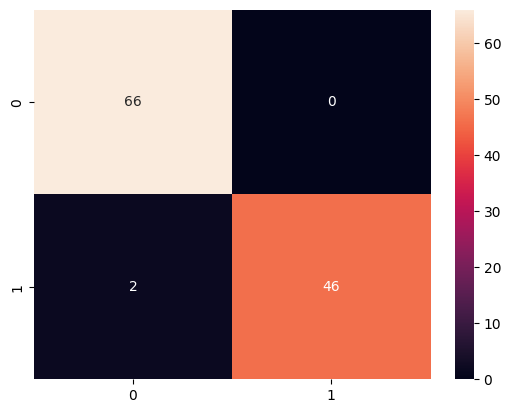

In [24]:
y_pred = svc_model.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [25]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        66
           1       1.00      0.96      0.98        48

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



**observation:** The accuracy has become 0.98 which is perfect

## Conclusion

- Machine learning techniques, specifically Support Vector Machines (SVM), demonstrated remarkable performance in classifying tumors into Malignant/Benign categories with an impressive accuracy of 98%.
- This suggests that the technique holds promise in rapidly evaluating breast masses and automating their classification.
- Early detection of breast cancer can significantly impact survival rates, particularly in developing regions where access to healthcare may be limited.
- Therefore, the application of such automated classification techniques could potentially save numerous lives.
- Moreover, there is potential for further enhancement by integrating computer vision and machine learning techniques to directly classify cancer using tissue images. This could lead to even more accurate and efficient diagnosis and treatment strategies.
